## Speeches targeted for the general public

In [ ]:
! pip install openpyxl
! pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [ ]:
import openpyxl as open 
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords


In [ ]:
# Charger le fichier Excel
data = pd.read_excel(
    "Database_centralbank_comm.xlsx",  
    header=None,                      
    names=["Institution", "Date", "Speech"]        
)

,Institution,Date,Speech
0,Institution,Date,Text
1,ECB,2025-12-18 00:00:00,We kept our key interest rates unchanged. We d...
2,ECB,2025-10-30 00:00:00,We kept our key interest rates unchanged We di...
3,ECB,2025-09-11 00:00:00,We kept our key interest rates unchanged We di...
4,ECB,2025-07-24 00:00:00,We kept our key interest rates unchanged\n\nWe...


In [6]:
data = data.iloc[1:].reset_index(drop=True)
data.head()

,Institution,Date,Speech
0,ECB,2025-12-18 00:00:00,We kept our key interest rates unchanged. We d...
1,ECB,2025-10-30 00:00:00,We kept our key interest rates unchanged We di...
2,ECB,2025-09-11 00:00:00,We kept our key interest rates unchanged We di...
3,ECB,2025-07-24 00:00:00,We kept our key interest rates unchanged\n\nWe...
4,ECB,2025-06-05 00:00:00,We cut our key interest rates by 0.25 percenta...


In [8]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
data.sample(5, random_state=42)

Institution                 Date  \
4          ECB  2025-06-05 00:00:00   
63         BoE  2022-08-04 00:00:00   
18         ECB  2023-09-14 00:00:00   
0          ECB  2025-12-18 00:00:00   
28         ECB  2022-06-09 00:00:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


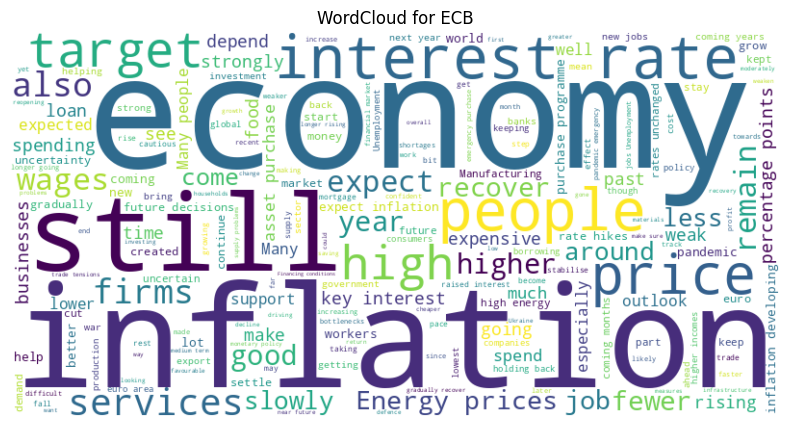

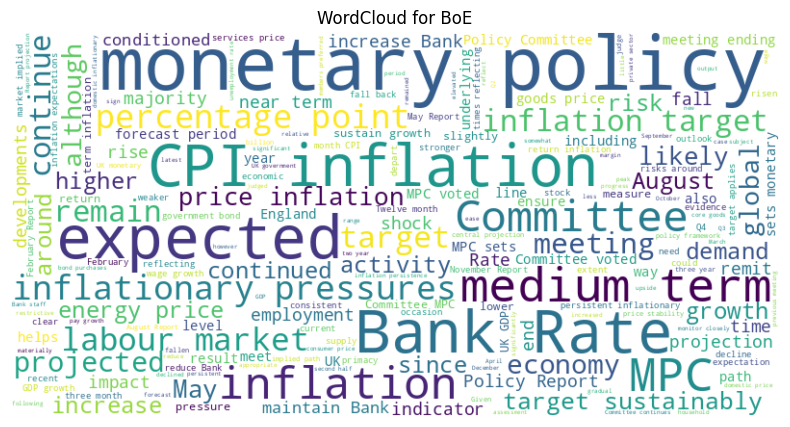

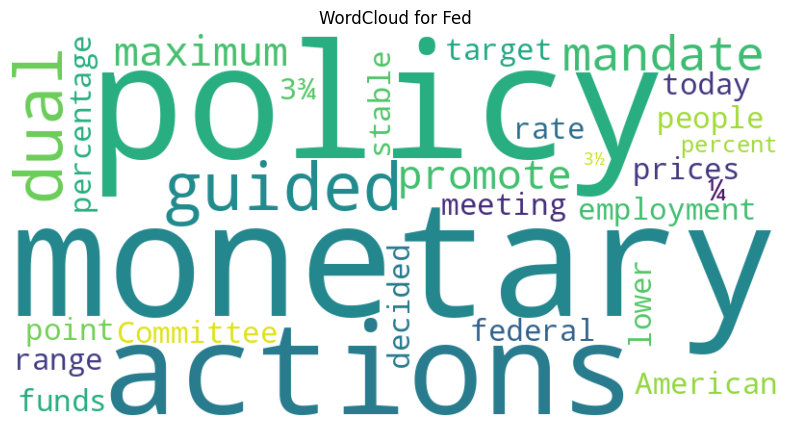

In [ ]:
nltk.download('stopwords')
# Stopwords en anglais
stop_words = set(stopwords.words('english'))


for cat in ['ECB', 'BoE', 'Fed']:
    
    # Sélection des discours par institution
    text_cat = " ".join(
        data.loc[data["Institution"] == cat, "Speech"].dropna()
    )
    
    # WordCloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stop_words,
        max_words=200
    ).generate(text_cat)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {cat}")
    plt.show()


## Classic speeches 
This dataset comes from this article : Campiglio, E., Deyris, J., Romelli, D. and Scalisi, G., 2025. Warning words in a warming world: Central bank communication and climate change. European Economic Review [Open Access], Vol 178.

In [ ]:
# Stockage et lecture des fichiers
import os
import requests
import s3fs

In [ ]:
# Database of Campiglio, Deyris, Romelli and Scalisi (saved in the SSP Cloud, too heavy for github) :
MY_BUCKET = "roux"
fs = s3fs.S3FileSystem(
    client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"}
)

files_url = f"{MY_BUCKET}/diffusion/data/"

fs.get(f"{MY_BUCKET}/diffusion/data/","", recursive=True)

# Lecture
table_films = pd.read_csv("base_allocine.csv")